In [63]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [64]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [79]:
data.describecribe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

In [66]:
# no null value is 
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

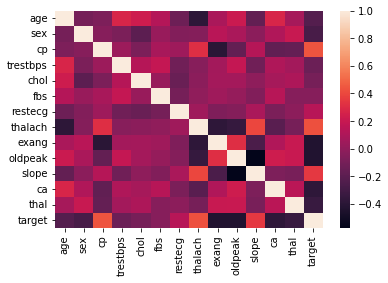

In [67]:
# checking the relation between variable
cor=data.corr()
sns.heatmap(cor)

Text(0.5, 1.0, 'heart disease')

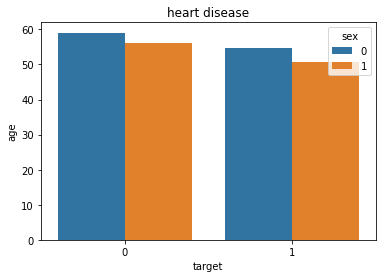

In [68]:
# showing the heart problem in male and female 
sns.barplot(x="target",y="age",hue='sex',data=data,ci=None)

plt.title("heart disease")

<AxesSubplot:xlabel='target', ylabel='count'>

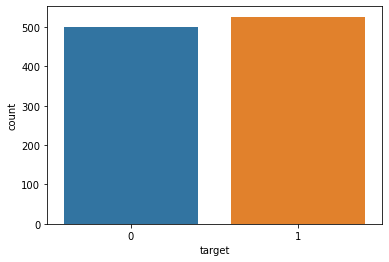

In [69]:
# checking the traget values
sns.countplot(x='target',data=data)

<AxesSubplot:>

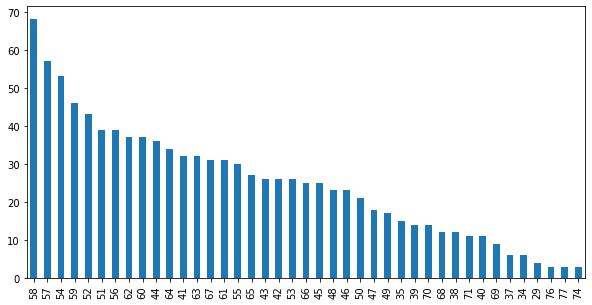

In [70]:
# seeing how much age people involve
plt.figure(figsize=(10,5))
pd.value_counts(data['age']).plot.bar()


<AxesSubplot:>

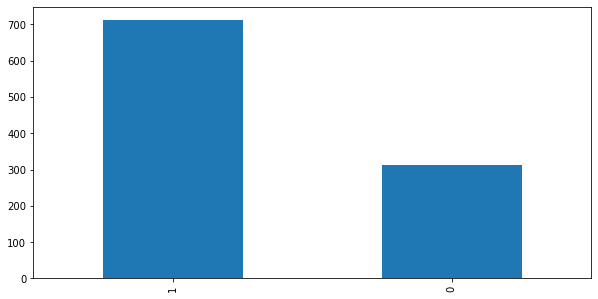

In [71]:
# number of male and fe male
plt.figure(figsize=(10,5))
pd.value_counts(data['sex']).plot.bar()

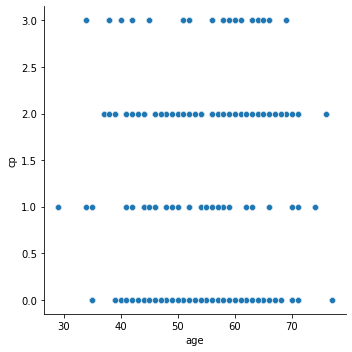

In [81]:
sns.relplot(x='age',y='cp',data=data)

<AxesSubplot:>

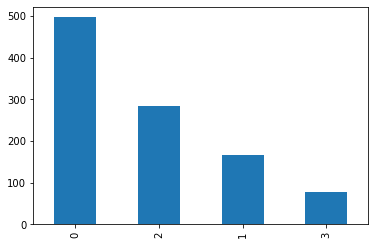

In [83]:
pd.value_counts(data['cp']).plot.bar()

<AxesSubplot:>

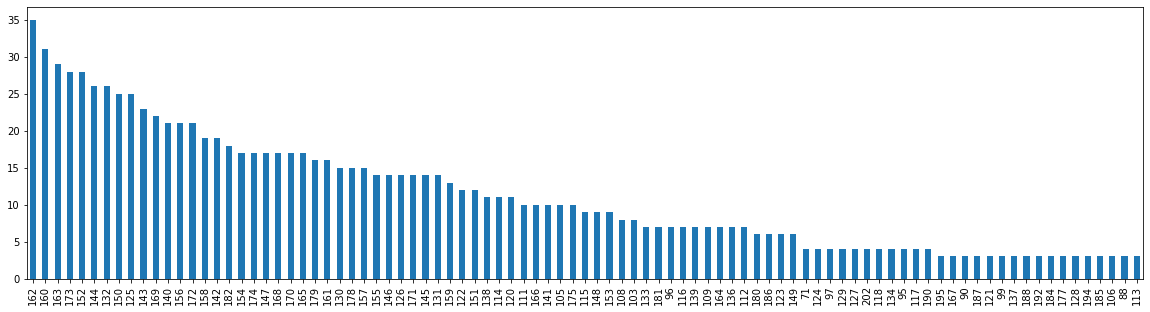

In [93]:
# most people heart rate is 162 
plt.figure(figsize=(20,5))
pd.value_counts(data['thalach']).plot.bar()

In [96]:
# hightest heart rate is 
data['thalach'].max()

202

In [86]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [72]:
# split it into x and y (value and target)
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [73]:
print(y_test.unique())


[1 0]


In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[84 14]
 [11 96]]


Accuracy of K-NeighborsClassifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [76]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score,'\n')
print(classification_report(y_test,xgb_predicted))

[11:22:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy of Extreme Gradient Boost: 0.9609756097560975 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        98
           1       0.97      0.95      0.96       107

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



D:\anaconda\anaconda_conda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [77]:
from sklearn.metrics import confusion_matrix
predict = xgb.predict(X_test)
cm = confusion_matrix(y_test,predict)
print('model accuracy is ',cm)

model accuracy is  [[ 95   3]
 [  5 102]]


Text(0.5, 1.0, 'heat_map')

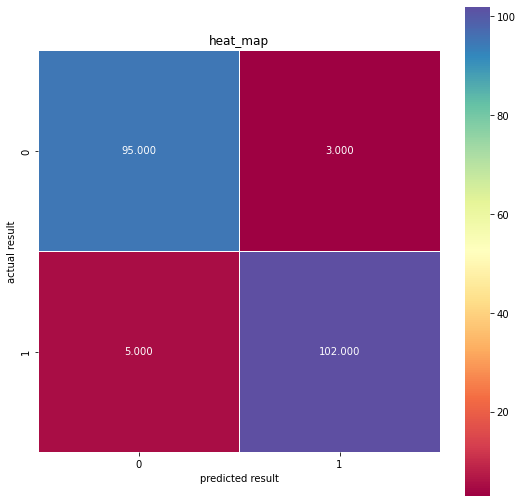

In [78]:
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True ,fmt='.3f', linewidths=0.5 , square= True , cmap = 'Spectral' )
plt.xlabel('predicted result')
plt.ylabel('actual result')

plt.title('heat_map')